# Project: Analyzing Global Land and Ocean Temperatures using PySpark in Jupyter Notebook

In [13]:
!java -version


java version "20.0.2" 2023-07-18
Java(TM) SE Runtime Environment (build 20.0.2+9-78)
Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)


#  1. Initialize PySpark:

In [14]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Temperature Analysis") \
    .getOrCreate()


# 2. Read Data into a DataFrame:

In [15]:
# Define the path
data_path = '/Users/kapilwanaskar/Downloads/Land_and_Ocean_complete.txt'

# Read the data into a DataFrame
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Show the first few records
df.show(100)


+--------------------------------------------------------------------------------+
|% This file contains a detailed summary of the changes in Earth's global average|
+--------------------------------------------------------------------------------+
|                                                            % surface tempera...|
|                                                            % temperature fie...|
|                                                                      % field.  |
|                                                            % The current cit...|
|                                                                              % |
|                                                                      %    Rohde|
|                                                                     %    Record|
|                                                            %    https://doi....|
|                                                                              % |
|   

# 3. Skipping Metadata Lines
First, let's try reading the file again while skipping any lines that start with the % character. This can be achieved by reading the entire file into an RDD, filtering out the unwanted lines, and then converting the RDD back to a DataFrame.

In [17]:
from pyspark.sql import Row


def convert_to_row(line):
    try:
        # Split the line by whitespace
        parts = line.split()
        
        # The data seems to have a year, month, and then the temperature.
        # Extract year, month, and temperature, converting them to int and float respectively
        year = int(parts[0])
        month = int(parts[1])
        temperature = float(parts[2])
        
        return Row(Year=year, Month=month, Temperature=temperature)
    except Exception as e:
        # Return None for lines that can't be processed, we'll filter them out later
        print(f"Failed processing line: {line}. Error: {e}")
        return None


# Continue with the filtering out lines starting with '%'
filtered_rdd = rdd.filter(lambda line: not line.startswith('%') and line.strip() != '')

# Convert to Row format
row_rdd = filtered_rdd.map(convert_to_row).filter(lambda x: x is not None)

# Convert the RDD into a DataFrame
df = row_rdd.toDF()

# Show the data
df.show()



+----+-----+-----------+
|Year|Month|Temperature|
+----+-----+-----------+
|1850|    1|     -0.769|
|1850|    2|     -0.227|
|1850|    3|     -0.374|
|1850|    4|     -0.591|
|1850|    5|     -0.623|
|1850|    6|     -0.359|
|1850|    7|     -0.184|
|1850|    8|     -0.168|
|1850|    9|     -0.429|
|1850|   10|     -0.607|
|1850|   11|     -0.589|
|1850|   12|     -0.501|
|1851|    1|     -0.177|
|1851|    2|     -0.421|
|1851|    3|     -0.563|
|1851|    4|      -0.62|
|1851|    5|     -0.328|
|1851|    6|     -0.264|
|1851|    7|      -0.22|
|1851|    8|     -0.314|
+----+-----+-----------+
only showing top 20 rows



In [20]:
df

DataFrame[Year: bigint, Month: bigint, Temperature: double]

# 4. Data Analysis:

In [18]:
from pyspark.sql.functions import avg

# Assuming your data has a 'Year' and 'Temperature' column
avg_temperatures = df.groupBy("Year").agg(avg("Temperature").alias("AvgTemperature"))

avg_temperatures.show()


+----+--------------------+
|Year|      AvgTemperature|
+----+--------------------+
|1950|-0.17570833333333336|
|1919|-0.30704166666666666|
|1936|           -0.145875|
|1951|1.250000000000076...|
|1958| 0.05566666666666666|
|1921|-0.18899999999999997|
|1882|-0.23979166666666665|
|1983|  0.3154166666666666|
|1905|-0.34104166666666663|
|1972|0.002916666666666666|
|1873|-0.25533333333333336|
|1979|            0.185625|
|2007|  0.6390416666666666|
|1887|-0.48550000000000004|
|1988| 0.37104166666666655|
|2014|  0.7238333333333333|
|1899| -0.2360833333333333|
|1908| -0.4479166666666666|
|1986|             0.18725|
|1895|-0.29941666666666666|
+----+--------------------+
only showing top 20 rows



# 5. Visualization

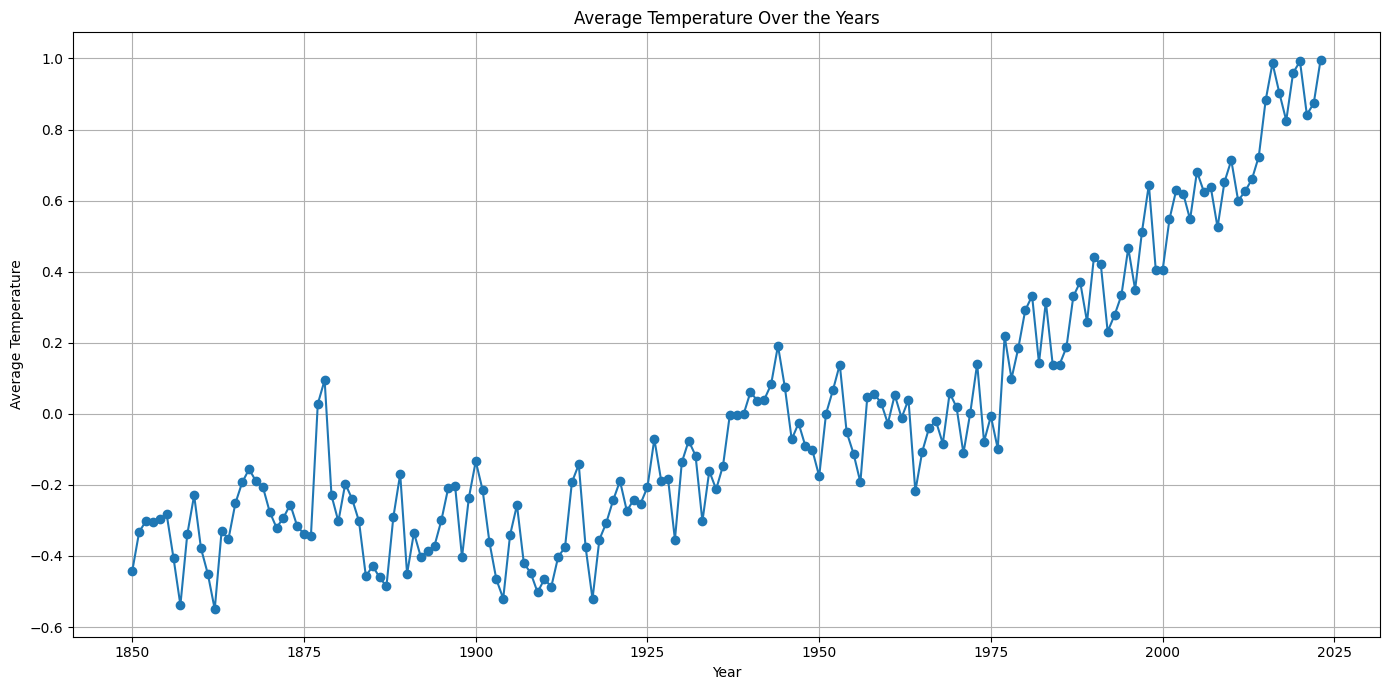

In [21]:
import matplotlib.pyplot as plt

# Sorting the avg_temperatures DataFrame by Year
sorted_avg_temperatures = avg_temperatures.orderBy("Year")

# Convert the Spark DataFrame to Pandas DataFrame for visualization
pdf = sorted_avg_temperatures.toPandas()

plt.figure(figsize=(14, 7))
plt.plot(pdf['Year'], pdf['AvgTemperature'], marker='o', linestyle='-')
plt.title('Average Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. Stopping the Spark Session:
Finally, don't forget to stop the Spark session when you're done.

spark.stop()
